In [1]:
%matplotlib inline

from IPython.display import Image
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this Jupyter Notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
#data libraries
import pandas as pd
import numpy as np

#plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#mathematical libraries
from sklearn import preprocessing
from scipy.stats import pearsonr

#notebook options
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')

# Relative Age Effect in Football.

## Purpose of the analysis: 

Would you like to know if your children ever had or still have a chance in professsional sport like football? Maybe you still wander why you're not the guy passing the ball to Messi or Cristiano Ronaldo? You can blame your nationality, height or ... __birth date__?

There's even a term for this: __relative age effect (RAE)__, also known as __birthdate effect__ or __birth date effect__! In short there's a belief that children born early in a year have a better chance in succeding in sports due to the the difference in maturity (they tend to be more developed physically, emotionally etc.), which can be really a key factor at young age.

## Table of contents:
1. Legends comparison
2. RAE vs Player count
3. RAE vs Player rating
4. Summary


## 1. Legends comparison

So ... let's begin by checking our two football icons: __Messi__ vs __Cristiano Ronaldo__:

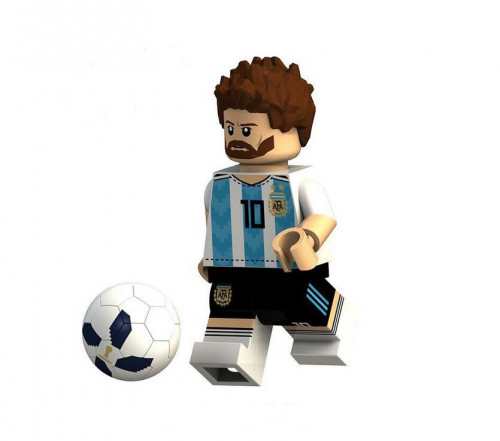

In [4]:
Image(filename=r"..\data\img\messi.jpg", width = 350)

Messi was born on __June 24__, 1987 so our theory does not fit here.

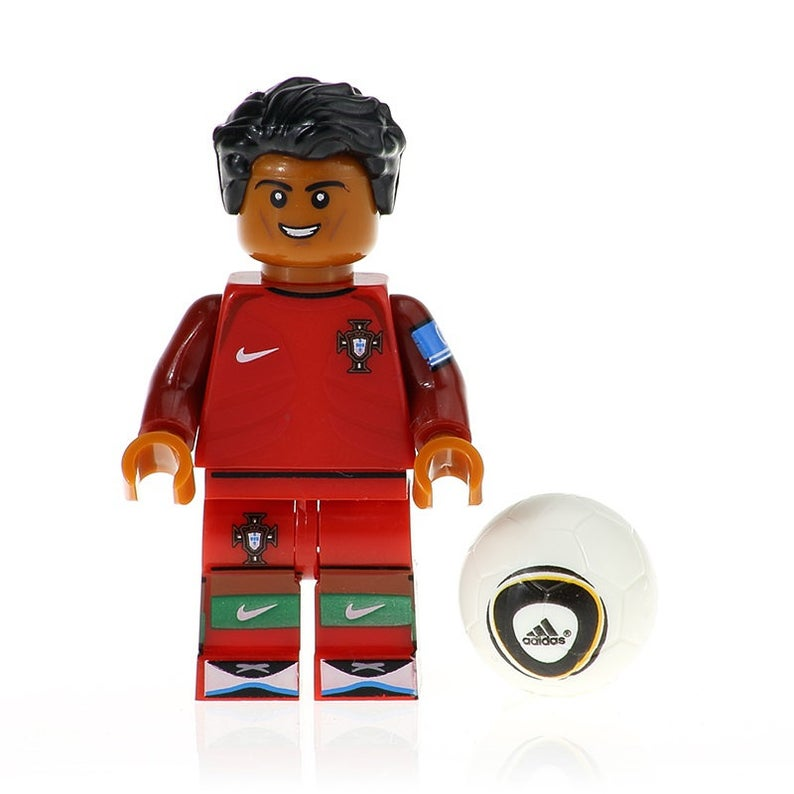

In [5]:
Image(filename=r"..\data\img\ronaldo.jpg", width = 275)

 Ronaldo on the other hand proves our point with being born on __February 5__, 1985.
 
 An what about best of the best : __Pele__ vs __Maradonna__?

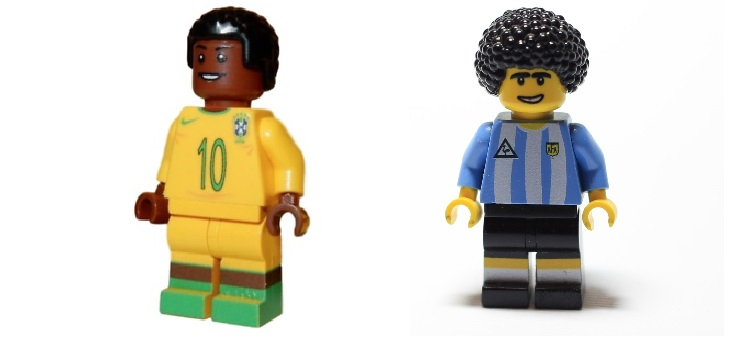

In [6]:
Image(filename=r"..\data\img\pele_maradona.jpg", width = 550)

Pele born on __October 23__, 1940 and Maradona on __October 30__, 1960 suggest that __October__ could be a magic month? Maybe ... 

## 2. RAE vs Player count

Now let's play with a __bigger__ dataset! We will use my favourite sport game - __FIFA__ (17's edition) database which will give us huge amount of information like player's nationality, statistics and of course the birth dates.

First let's read the data:

In [7]:
file_path = r"..\data\players_database.xlsx"

df = pd.read_excel(file_path)

df.sample(3)

,id,commonName,firstName,headshotImgUrl,lastName,league,nation,club,headshot,specialImages,position,playStyle,playStyleId,height,weight,birthdate,age,acceleration,aggression,agility,balance,ballcontrol,foot,skillMoves,crossing,curve,dribbling,finishing,freekickaccuracy,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,headingaccuracy,interceptions,jumping,longpassing,longshots,marking,penalties,positioning,potential,reactions,shortpassing,shotpower,slidingtackle,sprintspeed,standingtackle,stamina,strength,vision,volleys,weakFoot,traits,specialities,atkWorkRate,defWorkRate,playerType,fifaAttributes,name,quality,color,isGK,positionFull,isSpecialType,contracts,fitness,rawAttributeChemistryBonus,isLoan,squadPosition,itemType,discardValue,modelName,baseId,rating,created_at,updated_at
5187,163050,NaN,Billy,https://fifa17.content.easports.com/fifa/fltOn...,Sharp,60,14,1794,"O:8:\stdClass\"":3:{s:11:\""largeImgUrl\"";s:148:...","O:8:\stdClass\"":2:{s:15:\""largeTOTWImgUrl\"";N;...",ST,Basic,NaN,175,70,1986-02-05,30,69,71,70,73,65,Right,3,47,67,67,69,55,7,8,11,11,8,65,33,80,54,66,24,74,68,69,75,56,73,30,68,34,66,76,65,70,3,"a:2:{i:0;s:28:\Tries To Beat Defensive Line\"";...",N;,Medium,Medium,standard,"a:6:{i:0;O:8:\stdClass\"":3:{s:4:\""name\"";s:17:...",Sharp,silver,silver,0,Striker,0,NaN,NaN,NaN,NaN,NaN,player,NaN,FUTPlayerItem,163050,69,2016-09-21 16:34:07,2016-09-21 16:34:07
13587,235003,Park Tae Hwan,Tae Hwan,https://fifa17.content.easports.com/fifa/fltOn...,Park,349,167,113161,"O:8:\stdClass\"":3:{s:11:\""largeImgUrl\"";s:148:...","O:8:\stdClass\"":2:{s:15:\""largeTOTWImgUrl\"";N;...",CB,Basic,NaN,186,80,1997-07-29,19,75,54,58,45,38,Right,2,32,25,32,27,27,11,6,10,8,8,51,47,59,46,29,53,30,25,68,51,50,34,55,79,54,65,82,22,23,2,N;,N;,Low,Medium,rare,"a:6:{i:0;O:8:\stdClass\"":3:{s:4:\""name\"";s:17:...",Park Tae Hwan,bronze,rare_bronze,0,Centre Back,0,NaN,NaN,NaN,NaN,NaN,player,NaN,FUTPlayerItem,235003,56,2016-09-21 16:34:21,2016-09-21 16:34:21
3296,188669,Xumetra,Jordi,https://fifa17.content.easports.com/fifa/fltOn...,Xumetra Feliu,54,45,244,"O:8:\stdClass\"":3:{s:11:\""largeImgUrl\"";s:148:...","O:8:\stdClass\"":2:{s:15:\""largeTOTWImgUrl\"";N;...",RM,Basic,NaN,172,70,1985-10-24,30,81,61,77,78,73,Right,3,70,67,74,61,56,13,10,16,14,11,54,47,77,56,64,29,57,71,72,70,65,80,35,89,38,66,59,65,63,3,"a:1:{i:0;s:25:\Dribbler - Speed Dribbler\"";}""",N;,High,Medium,rare,"a:6:{i:0;O:8:\stdClass\"":3:{s:4:\""name\"";s:17:...",Xumetra,silver,rare_silver,0,Right Midfielder,0,NaN,NaN,NaN,NaN,NaN,player,NaN,FUTPlayerItem,188669,72,2016-09-21 16:34:03,2016-09-21 16:34:03


In [8]:
print(F"Number of players: {df.shape[0]}, number of attributes: {df.shape[1]}.")

Number of players: 14501, number of attributes: 78.


Lot's of columns ... I've looked on them and surely let's drop one's that have 1 unique value or all are NaN's.

In [9]:
cols_to_drop = []

for col in df.columns:
    if (df[col].nunique() == 0 or df[col].nunique() == 1):
        cols_to_drop.append(col)
        
df = df.drop(cols_to_drop, axis=1)

print(F"Number of players: {df.shape[0]}, number of attributes: {df.shape[1]}.")

Number of players: 14501, number of attributes: 67.


11 columns out, let's look what else we can drop to make our data simple and clear ...

In [10]:
df.sample(3)

,id,commonName,firstName,headshotImgUrl,lastName,league,nation,club,headshot,position,height,weight,birthdate,age,acceleration,aggression,agility,balance,ballcontrol,foot,skillMoves,crossing,curve,dribbling,finishing,freekickaccuracy,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,headingaccuracy,interceptions,jumping,longpassing,longshots,marking,penalties,positioning,potential,reactions,shortpassing,shotpower,slidingtackle,sprintspeed,standingtackle,stamina,strength,vision,volleys,weakFoot,traits,specialities,atkWorkRate,defWorkRate,playerType,fifaAttributes,name,quality,color,isGK,positionFull,isSpecialType,baseId,rating,created_at,updated_at
8654,174206,NaN,Glen,https://fifa17.content.easports.com/fifa/fltOn...,Moss,351,198,111766,"O:8:\stdClass\"":3:{s:11:\""largeImgUrl\"";s:148:...",GK,188,90,1983-01-19,33,36,26,42,50,12,Right,1,14,14,22,11,14,66,61,62,65,65,19,21,70,23,11,12,15,10,65,67,24,16,12,43,12,28,70,30,17,3,"a:2:{i:0;s:7:\Puncher\"";i:1;s:12:\""Long Throwe...",N;,Medium,Medium,standard,"a:6:{i:0;O:8:\stdClass\"":3:{s:4:\""name\"";s:17:...",Moss,silver,silver,1,Goalkeeper,0,174206,65,2016-09-21 16:34:13,2016-09-21 16:34:13
9956,203128,NaN,Thomas,https://fifa17.content.easports.com/fifa/fltOn...,Monconduit,17,18,1816,"O:8:\stdClass\"":3:{s:11:\""largeImgUrl\"";s:148:...",CM,184,79,1991-02-10,25,71,80,65,67,64,Right,2,59,55,59,46,49,12,9,14,13,13,59,67,78,67,49,66,52,21,66,66,70,60,69,72,66,90,75,64,39,3,"a:1:{i:0;s:12:\Injury Prone\"";}""",N;,Medium,Medium,rare,"a:6:{i:0;O:8:\stdClass\"":3:{s:4:\""name\"";s:17:...",Monconduit,bronze,rare_bronze,0,Centre Midfielder,0,203128,64,2016-09-21 16:34:15,2016-09-21 16:34:15
8950,208581,NaN,Zymer,https://fifa17.content.easports.com/fifa/fltOn...,Bytyqi,41,36,300,"O:8:\stdClass\"":3:{s:11:\""largeImgUrl\"";s:148:...",RM,176,70,1996-09-11,20,79,62,80,73,71,Right,4,62,65,70,58,60,13,14,15,9,10,43,12,63,55,61,14,62,54,79,62,60,67,13,78,13,67,62,47,58,3,"a:2:{i:0;s:5:\Flair\"";i:1;s:18:\""Technical Dri...",N;,Medium,Low,standard,"a:6:{i:0;O:8:\stdClass\"":3:{s:4:\""name\"";s:17:...",Bytyqi,silver,silver,0,Right Midfielder,0,208581,65,2016-09-21 16:34:13,2016-09-21 16:34:13


In [11]:
df = df[["name", "nation", "position", "height", "weight", "birthdate", "age", "rating"]]

df = df.drop_duplicates(subset="name", keep="first") # as better player'have many playing cards we will leave only the first we see in our dataset

Now look at all time  __Top 10__:

In [12]:
df.sort_values("rating", ascending=False).head(10)

,name,nation,position,height,weight,birthdate,age,rating
0,Pelé,54,CF,174,70,1940-10-23,75,95
1,Cristiano Ronaldo,38,LW,185,80,1985-02-05,31,94
2,Messi,52,RW,170,72,1987-06-24,29,93
3,Beckenbauer,21,CB,181,75,1945-09-11,71,93
4,Maldini,27,LB,187,85,1968-06-26,48,92
5,Baresi,27,CB,176,70,1960-05-08,56,92
6,Neuer,21,GK,193,92,1986-03-27,30,92
7,Suárez,60,ST,182,85,1987-01-24,29,92
8,Neymar,54,LW,174,68,1992-02-05,24,92
10,van Basten,34,ST,188,78,1964-10-31,51,91


So ... __Pelé__ it is ....

Now we have the core dataset for our main purpose, now we will work with __birthdate__ column. Our goal is to first create a __day_of_year__ column from which we can __scale values (from 0 to 1)__, where 0 means a player was born on 1st of January and 1 will mean that he was born on the 31st of December. 

A __week__ and __month__ columns will also come in handy.

In [13]:
df["month"] = df["birthdate"].dt.month
df["week"] = df["birthdate"].dt.week
df["day_of_year"] = df["birthdate"].dt.dayofyear

min_max_scaler = preprocessing.MinMaxScaler()
x = df[['day_of_year']].values
x_scaled = min_max_scaler.fit_transform(x)

df["day_of_year_scaled"] = x_scaled

In [14]:
df=df[["name", "nation", "position", "height", "weight", "rating", "age", "birthdate", "month", "week", "day_of_year", "day_of_year_scaled"]]
df.sample(3)

,name,nation,position,height,weight,rating,age,birthdate,month,week,day_of_year,day_of_year_scaled
9796,Legzdins,14,GK,193,78,64,29,1986-11-23,11,47,327,0.893151
9539,Bayır,48,RB,170,62,64,27,1989-02-05,2,5,36,0.095890
9438,Sebas Coris,45,LWB,182,72,64,23,1993-01-01,1,53,1,0.000000


Let's start with counting how many players were born each __month__:

In [15]:
df.groupby(["month"])["month"].count()

month
1     1196
2     1102
3     1111
4     1002
5      934
6      866
7      883
8      892
9      935
10     741
11     706
12     686
Name: month, dtype: int64

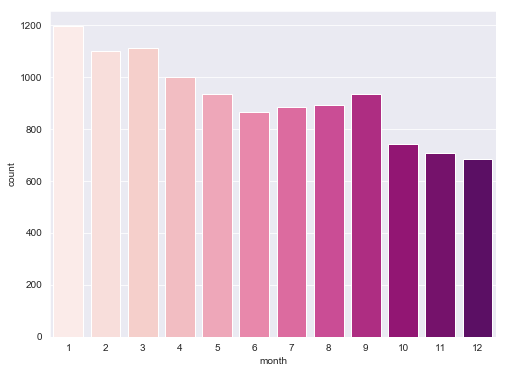

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x="month", data=df, palette="RdPu")
plt.show()

Let's emphasive the effect and look __quarters of the year__:

In [17]:
class_list = pd.cut(x=df["month"],
                    bins=[1, 4, 6, 9, 12],
                    include_lowest=True,
                    labels=[1, 2, 3, 4]).astype(int)

df["year_quarter"] = class_list

df.groupby(["year_quarter"])["year_quarter"].count()

year_quarter
1    4411
2    1800
3    2710
4    2133
Name: year_quarter, dtype: int64

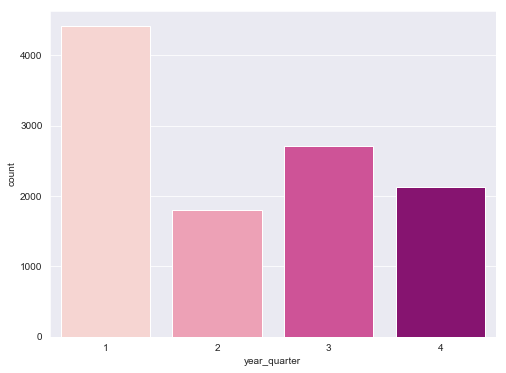

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x="year_quarter", data=df, palette="RdPu")
plt.show()

Wow! I think we've struck a gold mine here!

Let's turn to our "heavily" calculated __day_of_year_normalized__ column and see the data distribution.

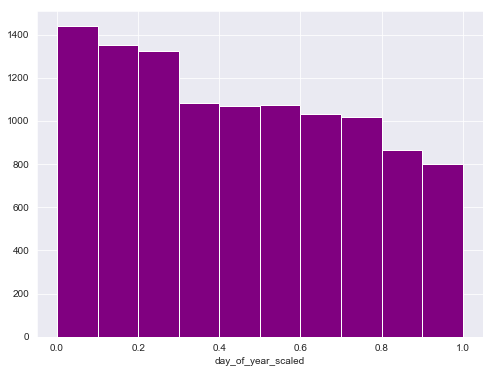

In [19]:
plt.figure(figsize=(8, 6))
sns.distplot(df["day_of_year_scaled"], kde=False, color="purple", hist_kws=dict(alpha=1), bins=10)
plt.show()

And after adding more bins:

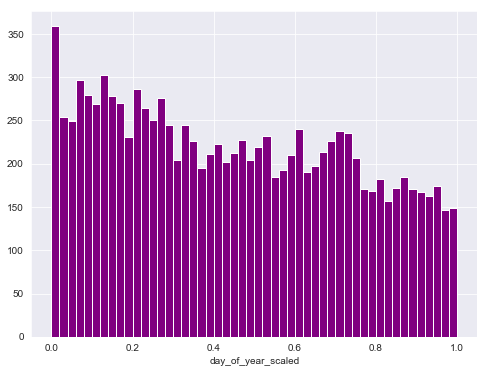

In [20]:
plt.figure(figsize=(8, 6))
sns.distplot(df["day_of_year_scaled"], kde=False, color="purple", hist_kws=dict(alpha=1), bins=50)
plt.show()

Over __350 players__ born in first few days of the year and __150 sportsmen__ born in last days of December! 

Additionaly let's visualize weekly tendency:

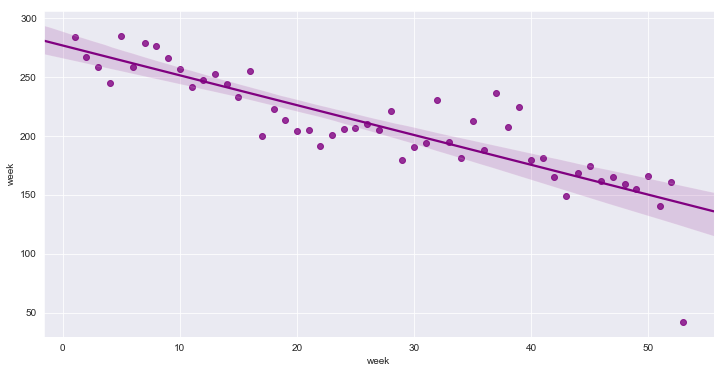

In [21]:
week_count = df.groupby(["week"])["week"].count()

plt.figure(figsize=(12, 6))
sns.regplot(x=week_count.index, y=week_count, color="purple", data=df)
plt.show()

Calculating the Pearson's correlation between two variables:

In [22]:
from scipy.stats import pearsonr

corr, _ = pearsonr(week_count.index, week_count)
print(f"Pearsons correlation: {corr}.")

Pearsons correlation: -0.8670566425481931.


also shows a __strong negative correlation__.

We've intentionally left the coded __nation__ column, so now we can compare sample coutries on the __RAE__ effect. 

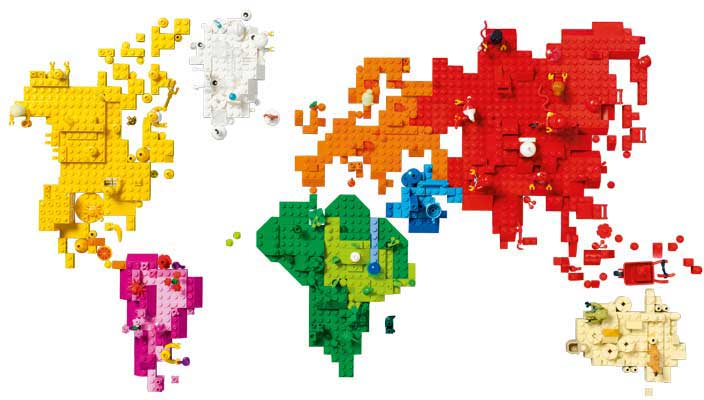

In [23]:
Image(filename=r"..\data\img\countries.jpg", width = 550)

First let's decode our nations:

In [24]:
argentina = df["nation"][df["name"]=="Messi"].values[0]
brazil = df["nation"][df["name"]=="Pelé"].values[0]
cameroon = df["nation"][df["name"]=="Onana"].values[0]
france = df["nation"][df["name"]=="Pogba"].values[0]
germany = df["nation"][df["name"]=="Neuer"].values[0]
italy = df["nation"][df["name"]=="Maldini"].values[0]
japan = df["nation"][df["name"]=="Nakamura"].values[0]
poland = df["nation"][df["name"]=="Lewandowski"].values[0]
portugal = df["nation"][df["name"]=="Luís Figo"].values[0]
spain = df["nation"][df["name"]=="De Gea"].values[0]

decoded_countries = [argentina, brazil, cameroon, france, germany, italy, japan, poland, portugal, spain]

df = df[df["nation"].isin(decoded_countries)]

decoded_dict = {argentina:"Argentina", brazil:"Brazil", cameroon:"Cameroon", france:"France", germany:"Germany", italy:"Italy", japan:"Japan", poland:"Poland", portugal:"Portugal", spain:"Spain"}
df = df.replace({"nation": decoded_dict})
df.head(3)

,name,nation,position,height,weight,rating,age,birthdate,month,week,day_of_year,day_of_year_scaled,year_quarter
0,Pelé,Brazil,CF,174,70,95,75,1940-10-23,10,43,297,0.810959,4
1,Cristiano Ronaldo,Portugal,LW,185,80,94,31,1985-02-05,2,6,36,0.095890,1
2,Messi,Argentina,RW,170,72,93,29,1987-06-24,6,26,175,0.476712,2


In [25]:
print(F"Number of players: {df.shape[0]}, number of attributes: {df.shape[1]}.")

Number of players: 4224, number of attributes: 13.


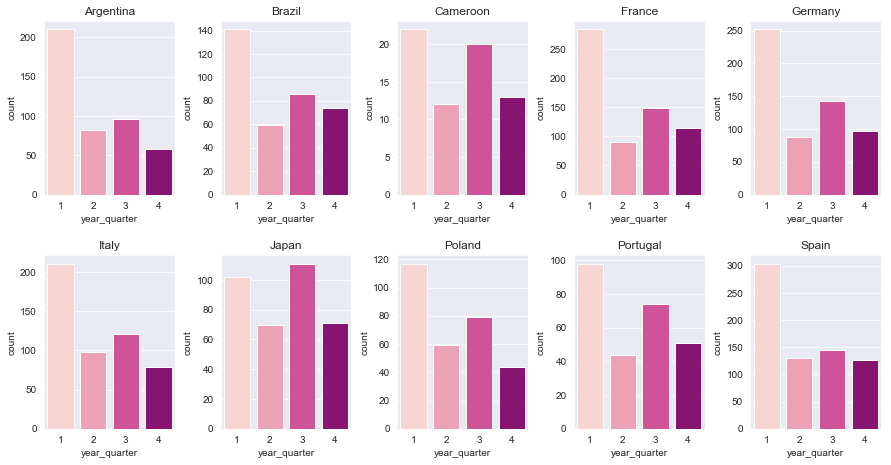

In [26]:
decoded_subplots_dict = {argentina:["Argentina", 0, 0], brazil:["Brazil", 0, 1] , cameroon:["Cameroon", 0, 2], france:["France", 0, 3], germany:["Germany", 0, 4], 
                         italy:["Italy", 1, 0], japan:["Japan", 1, 1], poland:["Poland", 1, 2], portugal:["Portugal", 1, 3], spain: ["Spain", 1, 4]}

fig, axes = plt.subplots(2, 5, figsize=(15,7.5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=0.35)

for nation, i, j,  in (decoded_subplots_dict.values()):
    sns.countplot(x="year_quarter", data=df[df["nation"]==nation], palette="RdPu", ax=axes[i,j]).set_title(nation)

Beside Japan the pattern is the same: the __vast mojority of players are born in 1st quarter__, next there is a significant drop in 2nd quarter with a rise in the 3rd one and then another drop in 4th quarter. 

A winner in an outlier competition is ... __Japan__ of course, as most of the players were born in the 3rd quarter of the year!

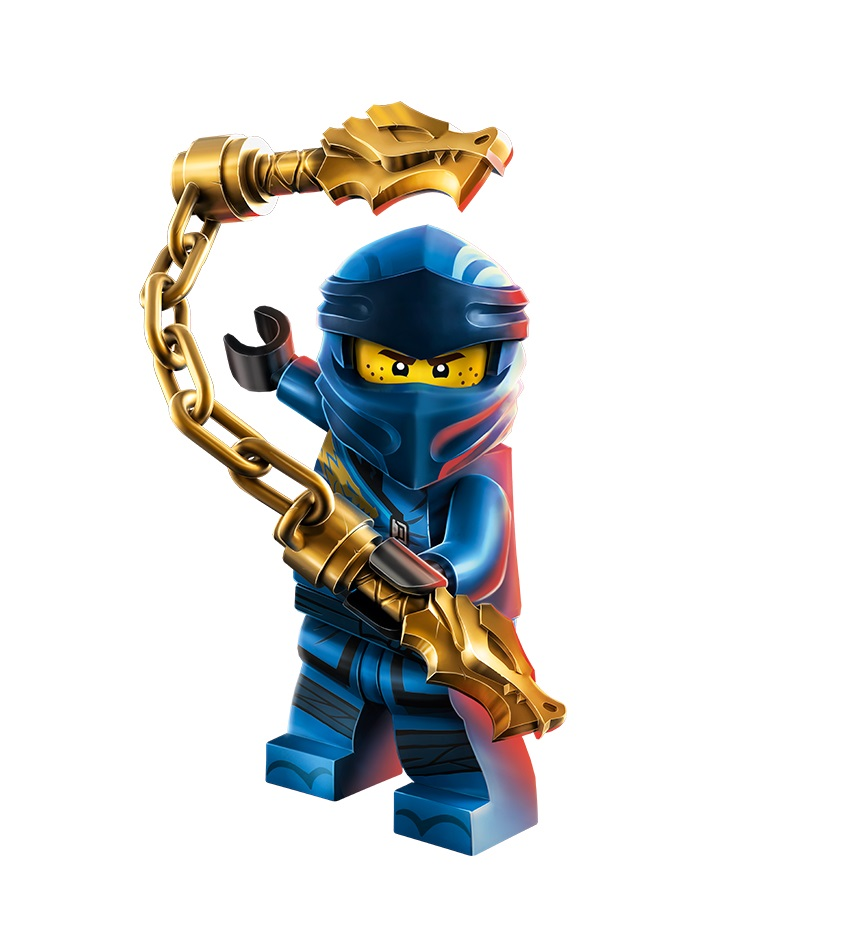

In [27]:
Image(filename=r"..\data\img\japan.jpg", width =250)

## 3. RAE vs Player rating

Approaching the end of the analysis ... __:(__ ... what about player's skill vs their birthdate?

<Figure size 864x864 with 0 Axes>

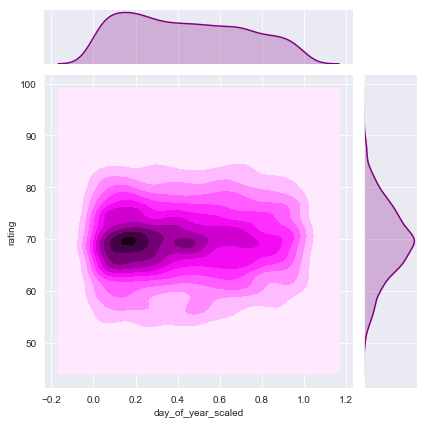

In [28]:
plt.figure(figsize=(12, 12))
sns.jointplot(x="day_of_year_scaled", y="rating", data=df, color="purple", kind="kde")
plt.show()

So __rating__ column has a classical normal distribution, we can of course see the density of players born in the earliest day on the year but still no correlation with their skills.

Let's double check on a violinplots for each month.

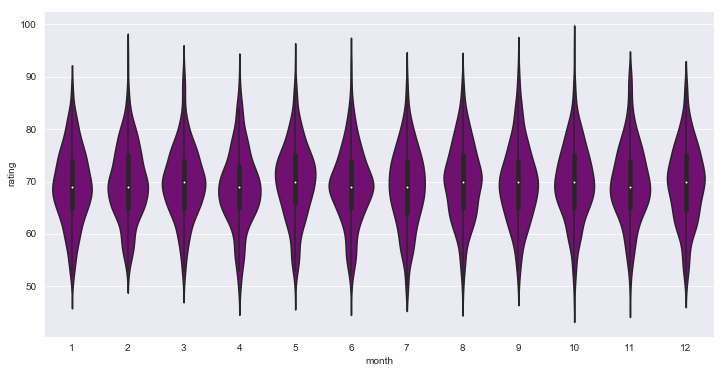

In [29]:
plt.figure(figsize=(12, 6))
sns.violinplot(x="month", y="rating", data=df, color="purple")
plt.show()

Like you've watched __"Attack of the Clones"__ ...

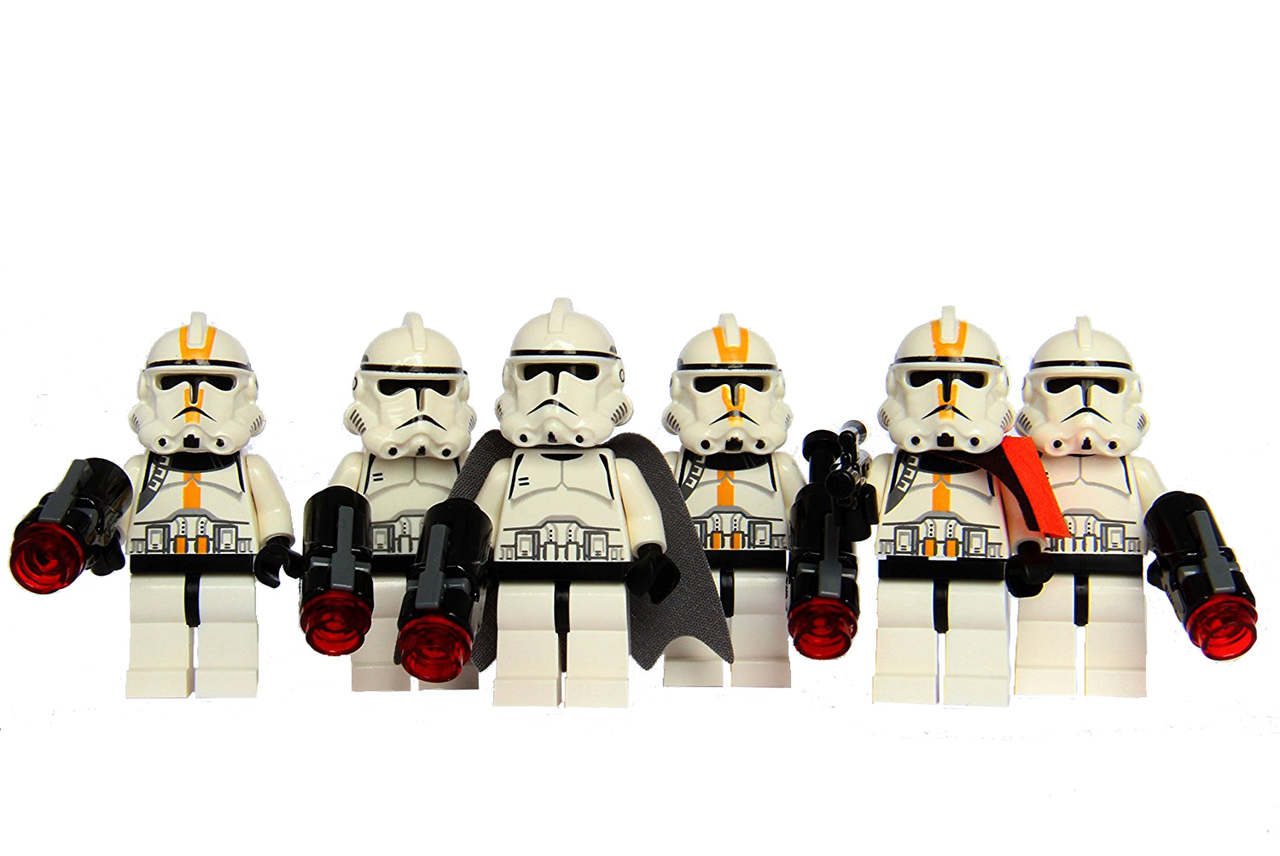

In [30]:
Image(filename=r"..\data\img\clones.jpg", width = 550)

## 4. Summary

We can see a strong correlation between Fifa players count in each part of the year, but still ... __don't blame your parents for that__ as next charts has shown that when evntually you appear in a team it's only your job to become a legend.

Hope you had fun reading this analysis (as it is a short tribute for yesterda's __Programmer's day!__).

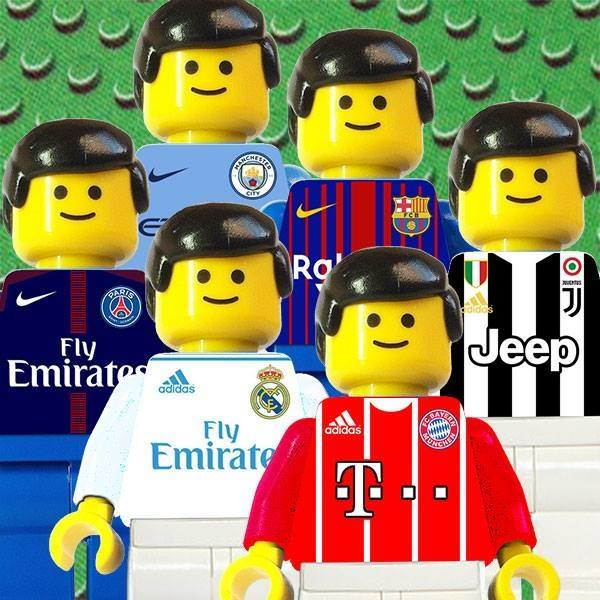

In [32]:
Image(filename=r"..\data\img\football.jpg", width = 350)

### @author

__Marcin Rydelski__, e-mail: marcin.rydelski@gmail.com